In [1]:
# Get packages, dictionaries, and function set up
import numpy as np
import json
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
# https://drive.google.com/file/d/1ZoyP-aMOW2TKFNDQraL5ia3jpe6ZgQdA/view?usp=sharing
colors = pd.read_csv('TMP_cohort_colors_n26_20210228.csv', sep = ',', skiprows = 1, names = ['Cohort', 'Hexi'])

counts = {}
scores = {}
errors = {}
header = None
# https://www.synapse.org/#!Synapse:syn25915900
with open("Sample_count_response.tsv") as handle:
    for tmp in handle:
        row = tmp.split("\t")
        if header is None:
            header = row
        else:
            n = row[0]
            c = json.loads(row[1])
            s = json.loads(row[2])
            e = json.loads(row[3])
            counts[n] = c
            scores[n] = s
            errors[n] = e

def sigmoid(x, a, b, c, d):
    y = 1 / (1 + np.exp(-((x/b)-a)))
    return y * c + d

lower = [0,0.1,0.1,0.0]
upper = [50,100,30,1.0]

In [2]:
# Look at cohort order for offsetting text boxes on plot
for i,cohort in enumerate(counts):
    print(cohort)

ACC
BLCA
BRCA
CESC
COADREAD
ESCC
GEA
HNSC
KIRCKICH
KIRP
LGGGBM
LIHCCHOL
LUAD
LUSC
MESO
OV
PAAD
PCPG
PRAD
SARC
SKCM
TGCT
THCA
THYM
UCEC
UVM


In [3]:
# Sklearn version for mse function
from sklearn.metrics import mean_squared_error
import sklearn
sklearn.__version__ # Need above version 22

'0.24.1'

In [4]:
# Parameter table
lower = [0,0.1,0.1,0.0]
upper = [50,100,30,1.0]
rmse = []
below_100 = []
above_100 = []
fits = {}
for i,cohort in enumerate(counts):
    f, _ = curve_fit(sigmoid, counts[cohort], scores[cohort], bounds=[lower,upper])
    fits[cohort] = f
    y_hat = sigmoid(counts[cohort], *f) 
    rmse.append(mean_squared_error(scores[cohort], y_hat, squared=False))
    below_100.append(mean_squared_error(scores[cohort][:10], y_hat[:10], squared=False))
    if len(scores[cohort][10:]) == 0:
        above_100.append('N/A')
    else:
        above_100.append(mean_squared_error(scores[cohort][10:], y_hat[10:], squared=False))
fdf = pd.DataFrame(fits).transpose()
fdf.columns = ['a','b','c','d']
fdf['RMSE'] = rmse
fdf['RMSE_below_100'] = below_100
fdf['RMSE_above_100'] = above_100

In [5]:
fdf

,a,b,c,d,RMSE,RMSE_below_100,RMSE_above_100
ACC,3.657399e-12,16.667146,0.634280,2.088115e-01,0.002914,0.002914,N/A
BLCA,2.034753e-18,24.399362,0.739840,3.542225e-02,0.011735,0.015380,0.008475
BRCA,1.084393e-18,29.054542,0.746883,1.041357e-01,0.011951,0.015705,0.00858
CESC,4.834592e-24,19.242794,0.517718,4.019066e-01,0.011890,0.013021,0.010055
COADREAD,2.317490e-01,23.716486,0.753739,9.674757e-21,0.015828,0.021471,0.010496
ESCC,1.319317e-14,11.716883,0.713892,2.376729e-01,0.007498,0.007498,N/A
GEA,7.531364e-18,31.044185,0.665441,9.621748e-02,0.012511,0.014947,0.010579
HNSC,3.893756e-01,36.961827,0.774391,1.772819e-17,0.011726,0.016567,0.006796
KIRCKICH,1.989382e-18,48.793715,0.210559,7.694366e-01,0.005947,0.008348,0.003533
KIRP,2.209967e-16,41.266690,0.454777,4.181017e-01,0.006267,0.007195,0.003781


In [6]:
fdf.to_csv('Power_analysis_sigmoid_parameters_RMSE_values.tsv',
          sep = '\t')

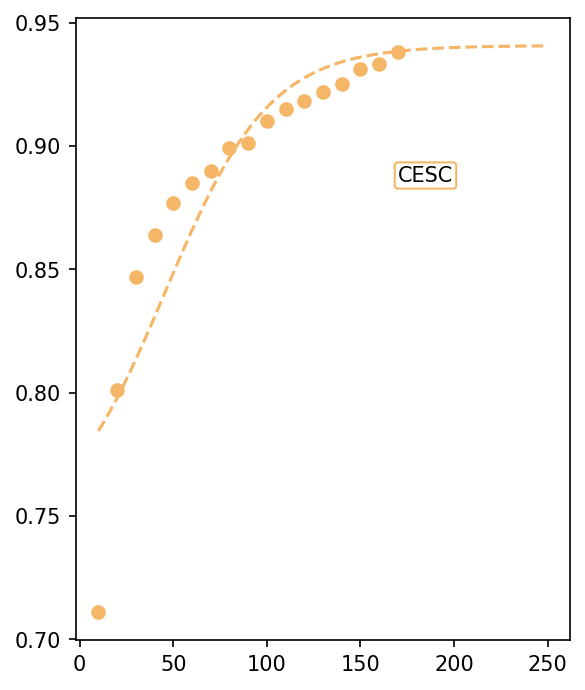

In [7]:
# Experiment with bound values on individual cancer

# def sigmoid(x, a, b, c, d):
#     y = 1 / (1 + np.exp(-((x/b)-a)))
#     return y * c + d

# lower = [0,0.1,0.1,0.0]
# upper = [50,100,30,1.0]

lower = [1.63,28,.2,0]
upper = [25,40,80,1.0]
cohort = 'CESC'
fig, ax = plt.subplots(figsize = (4.25,5.5), dpi = 150)
f, _ = curve_fit(sigmoid, counts[cohort], scores[cohort], bounds=[lower,upper])
color_shard = colors[colors.Cohort == cohort]
colr = color_shard.iloc[0,1]
ax.plot(counts[cohort], scores[cohort], 'o', c = colr)
ax.text(counts[cohort][-1], scores[cohort][-1]-.05, cohort, fontsize = 10,va='center',
       bbox = dict(facecolor='white', edgecolor=colr, boxstyle='round,pad=0.15'))
x = np.linspace(10, 250, 1000)
y = sigmoid(x, *f)  
ax.plot(x, y, '--', color=colr)

In [8]:
# Setup for classifier lables
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [9]:
clf_list = [
    [SGDClassifier(alpha=0.001,loss='perceptron',penalty='l1')],
    [SVC(C=0.2,kernel='linear')],
    [SVC(C=1,kernel='linear')],
    [SVC(C=2,kernel='linear')],
    [SVC(C=1.5,kernel='linear')],
    [SVC(C=1,kernel='linear')],
    [SVC(C=1.5,kernel='rbf')],
    [SVC(C=2,kernel='linear')],
    [SGDClassifier(alpha=0.0001,loss='squared_hinge',penalty='l1')],
    [SVC(C=0.2,kernel='linear')],
    [SVC(C=2,kernel='linear')],
    [SVC(C=0.5,kernel='linear')],
    [SVC(C=0.2,kernel='linear')],
    [SVC(C=1.5,kernel='linear')],
    [SVC(C=0.2,kernel='linear')],
    [SVC(C=0.2,kernel='linear')],
    [PassiveAggressiveClassifier(C=0.8)],
    [PassiveAggressiveClassifier(C=1.0)],
    [PassiveAggressiveClassifier(C=0.4)],
    [SVC(C=0.2,kernel='linear')],
    [SGDClassifier(alpha=0.1,loss='hinge',penalty='l2')],
    [SVC(C=2,kernel='poly')],
    [SVC(C=1.5,kernel='rbf')],
    [SVC(C=1.5,kernel='linear')],
    [SVC(C=0.2,kernel='rbf')],
    [SVC(C=0.2,kernel='linear')],
]

In [10]:
# Build object to label classifiers on plot
rmse_clf = fdf.copy()
rmse_clf['Clf'] = [0]*26
for i, clf in enumerate(clf_list):
    rmse_clf.iloc[i,7] = str(clf_list[i][0])
rmse_clf.head()

,a,b,c,d,RMSE,RMSE_below_100,RMSE_above_100,Clf
ACC,3.657399e-12,16.667146,0.634280,2.088115e-01,0.002914,0.002914,N/A,"SGDClassifier(alpha=0.001, loss='perceptron', ..."
BLCA,2.034753e-18,24.399362,0.739840,3.542225e-02,0.011735,0.015380,0.008475,"SVC(C=0.2, kernel='linear')"
BRCA,1.084393e-18,29.054542,0.746883,1.041357e-01,0.011951,0.015705,0.00858,"SVC(C=1, kernel='linear')"
CESC,4.834592e-24,19.242794,0.517718,4.019066e-01,0.011890,0.013021,0.010055,"SVC(C=2, kernel='linear')"
COADREAD,2.317490e-01,23.716486,0.753739,9.674757e-21,0.015828,0.021471,0.010496,"SVC(C=1.5, kernel='linear')"


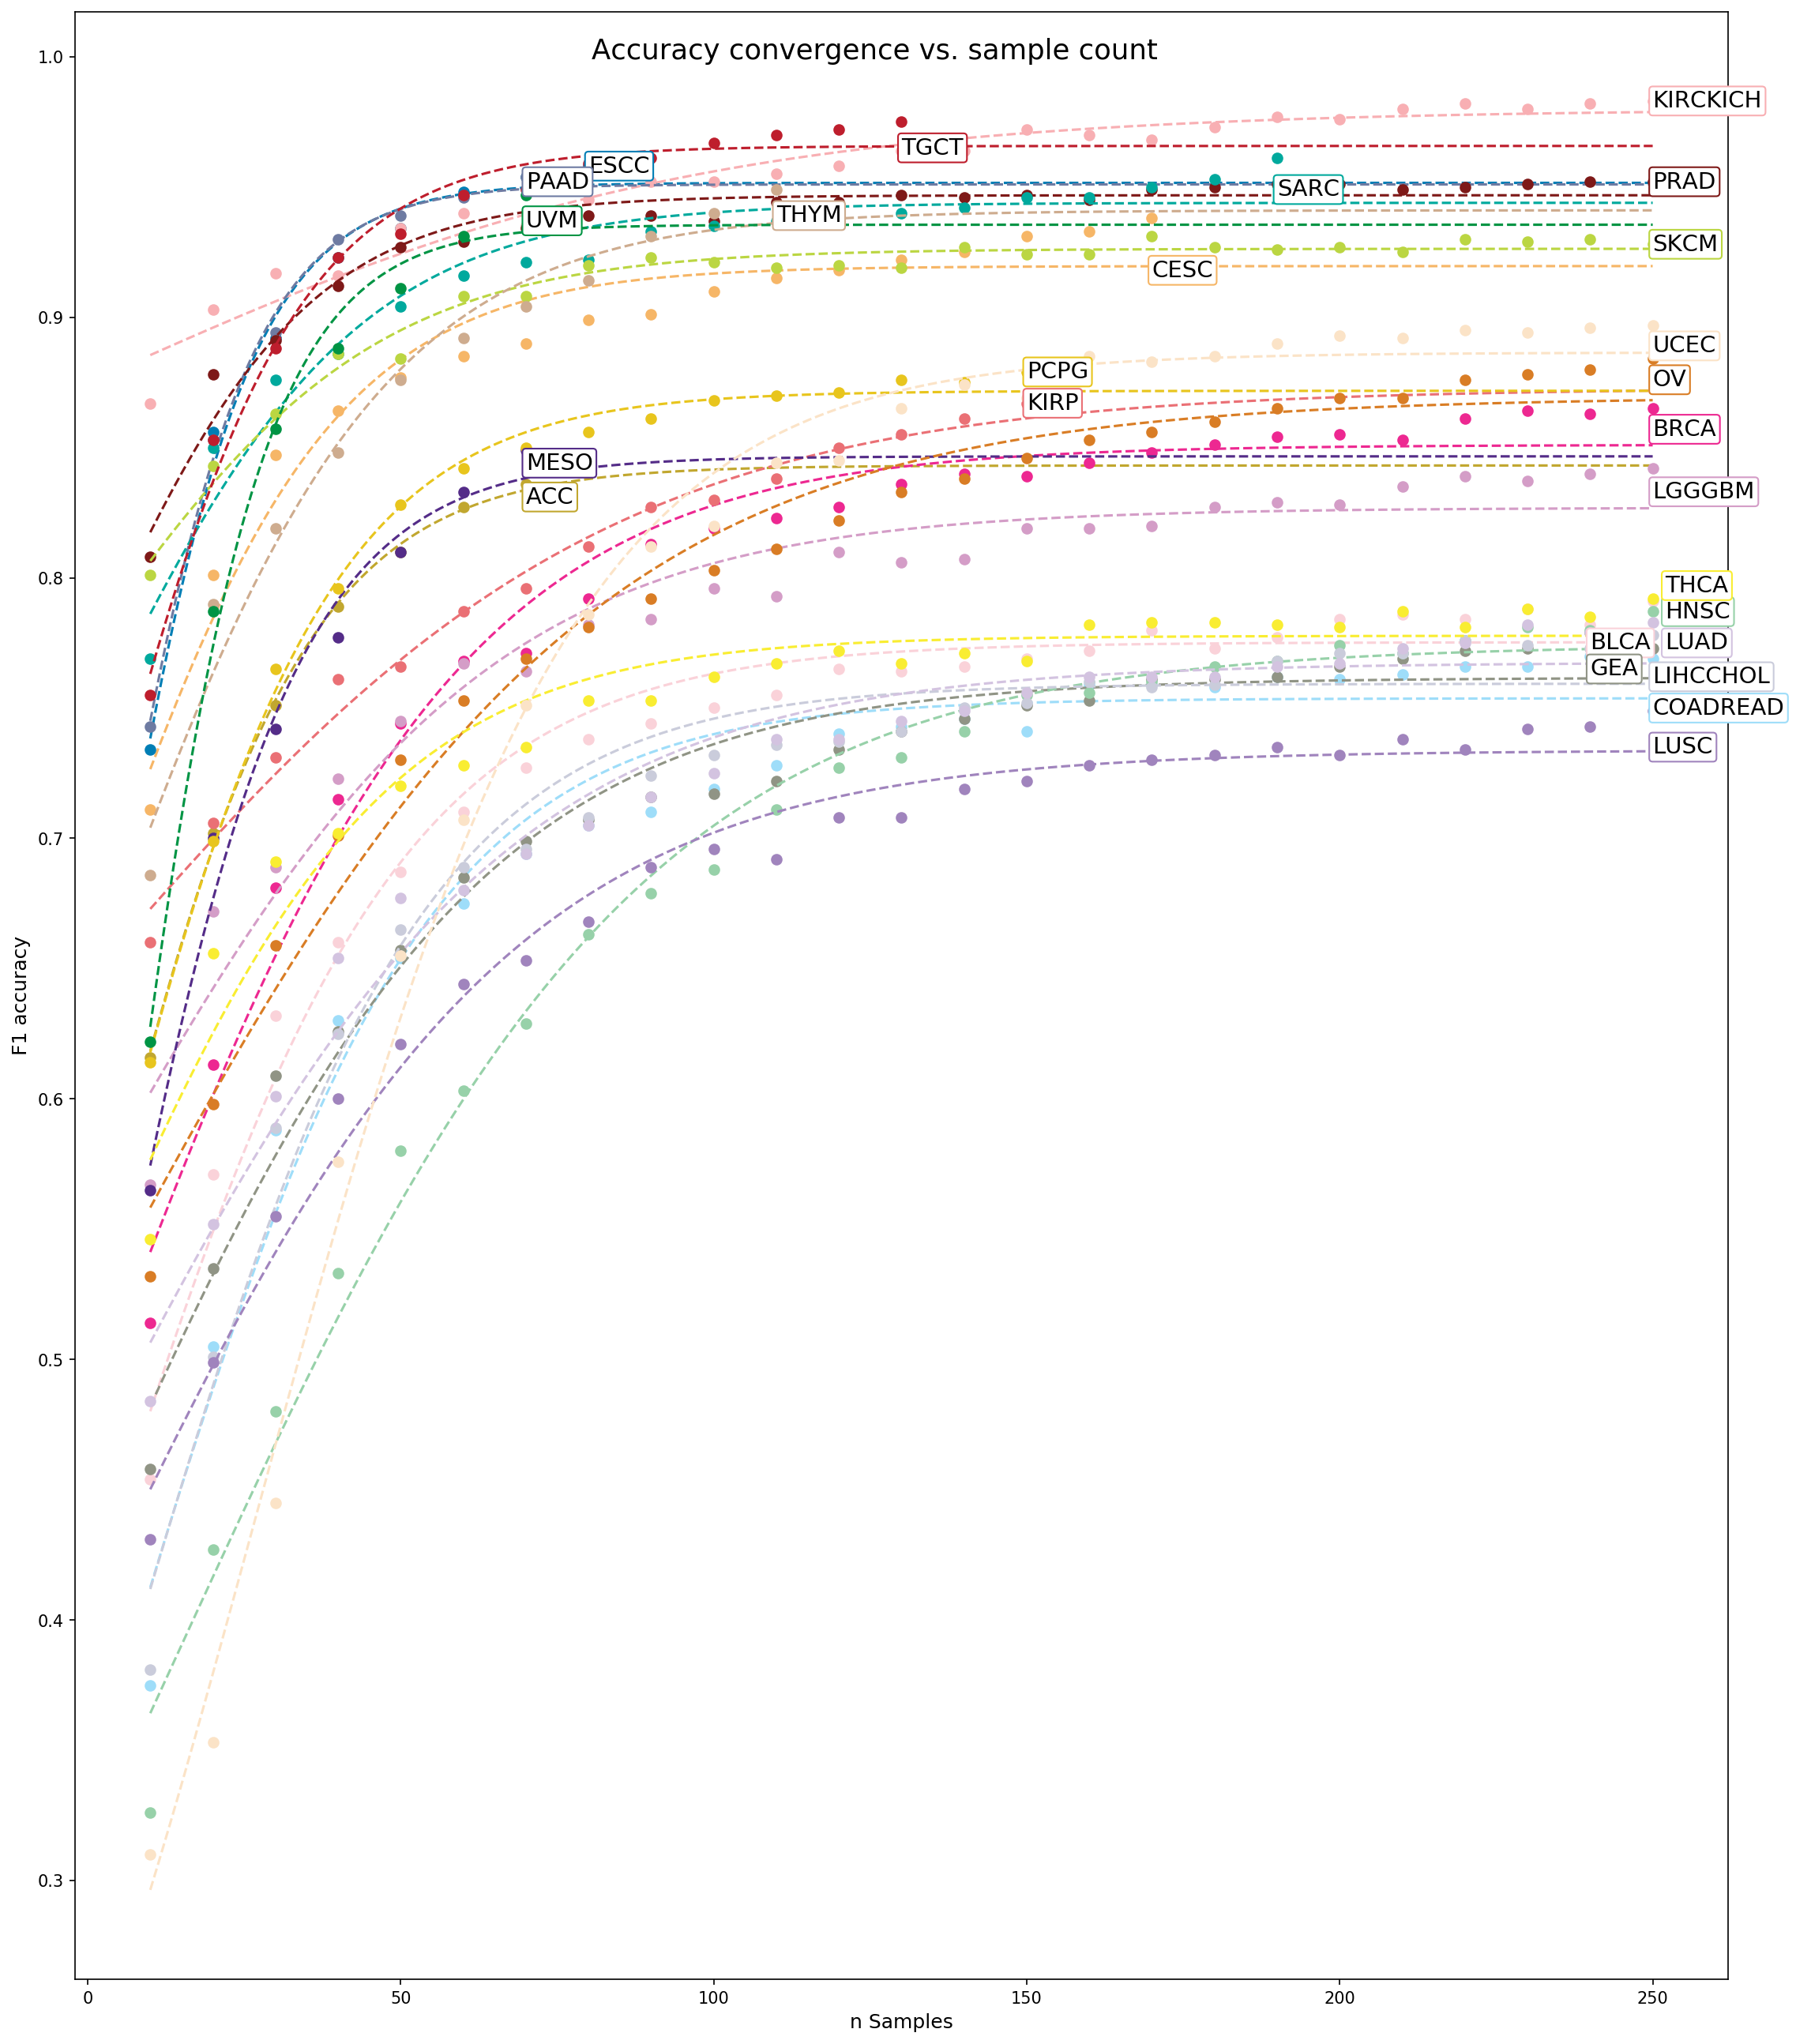

In [13]:
# Plot fitted curves vs. raw data
fig, ax = plt.subplots(figsize = (18,22), dpi = 150)

# Set bounds to default
lower = [0,0.1,0.1,0.0]
upper = [50,100,30,1.0]

# Adjust individual cohort labels up and down
offset = [-.005,-.016,-.008,-.02,-.019,
          0,-.008,0,0,0,
          -.009,-.016,-.008,-.014,-.005,-.008,
          -.002,0,0,-.012,0,
          -.01,.005,-.01,-.008,-.01]

# Adjust individual cohort labels side to side
left_shift = [0,-10,0,0,0,0,-10,2,0,0,
             0,0,2,0,0,0,0,0,0,0,
             0,0,2,0,0,0]

for i,cohort in enumerate(counts):
    f, _ = curve_fit(sigmoid, counts[cohort], scores[cohort], bounds=[lower,upper])
    color_shard = colors[colors.Cohort == cohort]
    colr = color_shard.iloc[0,1]
    ax.plot(counts[cohort], scores[cohort], 'o', c = colr)
    ax.text(counts[cohort][-1]+left_shift[i], scores[cohort][-1]+offset[i], cohort, fontsize = 14,va='center',
           bbox = dict(facecolor='white', edgecolor=colr, boxstyle='round,pad=0.15'))
    x = np.linspace(10, 250, 1000)
    y = sigmoid(x, *f)  
    ax.plot(x, y, '--', color=colr)
    
# rmse_sorted = rmse_clf.sort_values('RMSE')
# shift = .01
# ax.text(107, .6+shift, 'Cohort')
# ax.text(125, .6+shift, 'RMSE')
# ax.text(140, .6+shift, 'Classifier')
# for i, val in enumerate(rmse_sorted.RMSE):
#     ax.text(107, .6-i*shift, rmse_sorted.index[i])
#     ax.text(125, .6-i*shift, round(val, 4))
#     ax.text(140, .6-i*shift, rmse_sorted.iloc[i,-1]) 
    
fig.suptitle('Accuracy convergence vs. sample count', y = .87,fontsize = 17)
ax.set_xlabel('n Samples', fontsize = 12)
ax.set_ylabel('F1 accuracy', fontsize = 12)
# plt.savefig('RMSE_analysis.png',dpi=180)
plt.savefig('Power_analysis.png',dpi=180)
plt.show()